![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)
# **Dilation, Erosion and Edge Detection**

####**In this lesson:**
1. Dilation - Kengayish
2. Erosion - Kamayish
3. Opening - Ochilish
4. Closing - Yopilish
5. Canny Edge Detection - Canny Qirrani aniqlash

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# 1. **Dilation, Erosion** 

- **Dilation** – Rasmdagi ob'ektlar chegaralariga piksel qo'shadi, cv2.dilate
- **Erosion** – Rasmdagi ob'ektlar chegaralaridagi piksellarni olib tashlaydi, cv2.erode
- **Opening** - Dilation dan keyingi erosion, cv2.morphologyEx
- **Closing** - Erosiondan keyingi Dilation, cv2.morphologyEx

![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/resources/erosion%2C%20dilation.png)

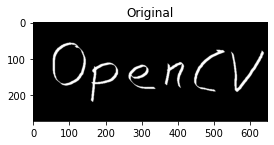

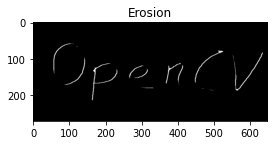

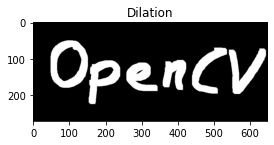

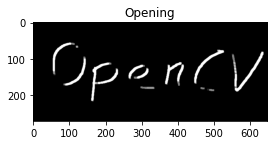

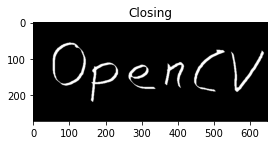

In [10]:
import cv2
import numpy as np

image = cv2.imread('Datasets/images/opencv_inv.png', 0)
imshow('Original', image)

#kernel yaratamiz. #Kattaroq kernel bo'lsa (7x7) funksiyalar ko'proq darajada amalga oshirladi
kernel = np.ones((5,5), np.uint8)

#Kernel boyicha kamaytirish chegarani
#iteration scale uchun. qancha katta bolsa shuncha kop qollanadi
erosion = cv2.erode(image, kernel, iterations = 1) 
imshow('Erosion', erosion)

#Kernel boyicha ko'paytirish
dilation = cv2.dilate(image, kernel, iterations = 3)
imshow('Dilation', dilation)

# Opening - noise removing uchun foydali, source, function, kernel
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - noise removing uchun foydali
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

# 2 **Canny Edge Detection** 
![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/resources/edge%20detection.png)

- Birinchi argument input rasm
- 3 va 4 - argumentlar minval va maxVal  
- 4-argument aperture_size. Bu Sobel kernel size hisoblanib, rasmdagi gradient (tushish)larni topish uchun ishlatiladi. By default 3.

Edge detection ishlatish uchun threshold lozim qaysiki qaysi oraliqda edge topilishi kerakligi

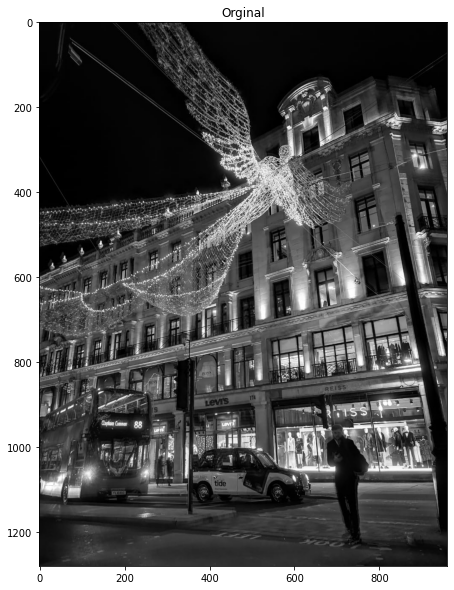

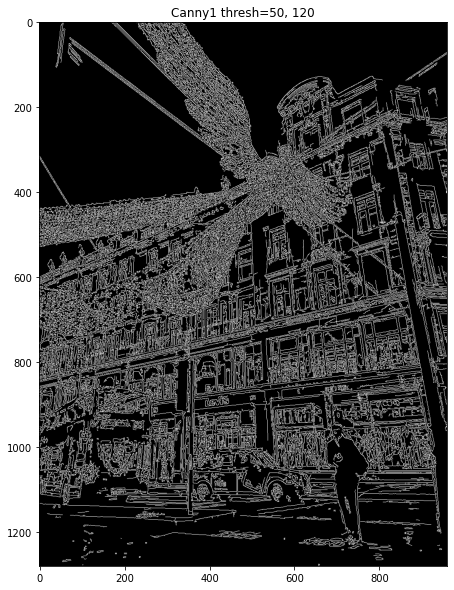

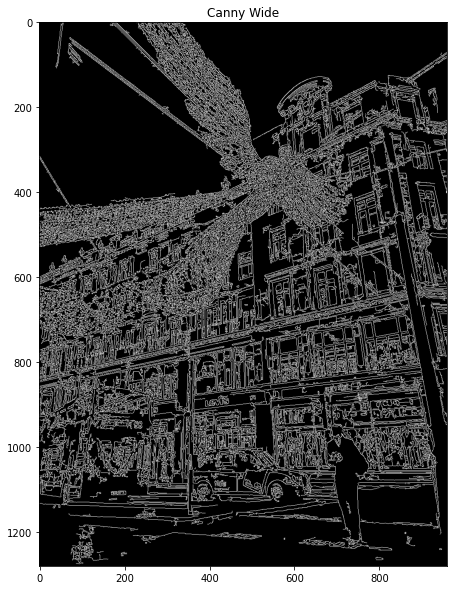

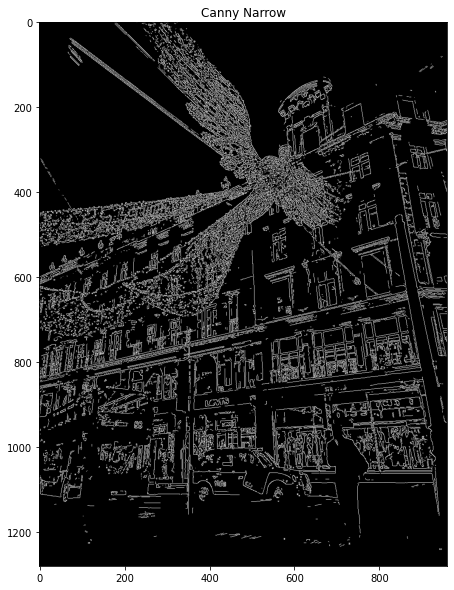

In [20]:
image = cv2.imread('Datasets/images/londonxmas.jpeg',0)
imshow("Orginal", image)

#Canny detection gradient valuelarni threshold uchun qo'llaydi. 
#birinchi threshold bu gradient
canny = cv2.Canny(image, 50, 120)
imshow("Canny1 thresh=50, 120", canny)

## Keyin, biz ikkita qiymatni berishimiz kerak: threshold1 va threshold2. 2 thresholddan kattaroq har qanday gradient qiymati
# edge deb hisoblanadi. 1 thresholdan past bo'lgan har qanday qiymat edge emas deb hisoblanadi.
#Thresh1 va thresh2 orasidagi valuelar ularning 'intensity'si qanday bog'langaniga ko'ra ham edge ham non-edge bo'lishi mumkun 
# Demak thresh 2 dan har qanday yuqori qiymat edge hisoblanadi. 



#Kengroq threshold ko'proq edge beradi
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Kichik oraliq threshold esa, kamroq edge beradi
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)


## **Auto Canny** - stackoverflowdan olingan kod

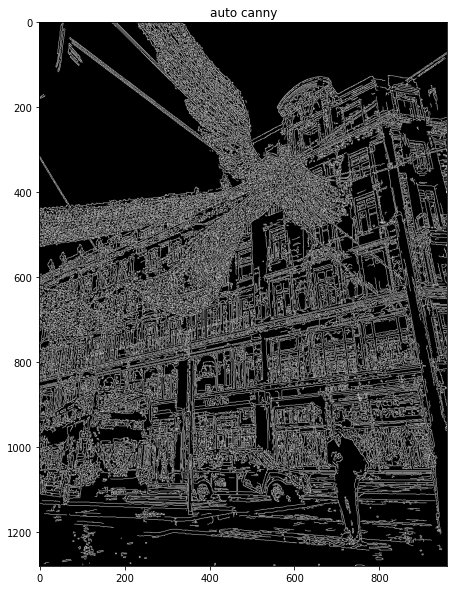

In [24]:
def autoCanny(image):
    #Finds optimal thresholds based on median image pixel intensity
    blurred_img = cv2.blur(image, ksize=(5,5))
    med_val = np.median(image) 
    lower = int(max(0, 0.66 * med_val))
    upper = int(min(255, 1.33 * med_val))
    edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
    return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)